In [3]:
import gspread
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

\[US CPI and Fed Funds, 1967-1984 vs 2015-now\]

Давно хотел сделать это сравнение, особенно потому что графики становятся все больше похожи. Инфляция  США историческая [1967-1986] синим, инфляция текущая \[2015-now\] оранжевым. 

\[график1\]

Из данного графика у меня возникает 3 вопроса:

Q1. Когда ожидать разгона инфляции судя по данным графикам?
Q2. Что если второй разгон инфляции в США был из-за слишком dovish политики FED в 1978 году?
Q3. Значит ли это, что нас впереди ждет вторая волна инфляции (напомнило мне фразу вторая волна ковида)?

Q1: Я вижу два варианта из графиков. Первый - в 4 квартала этого года. Второй - в 1 полугодии следующего года. Зависит от того как воспринимать скачок инфляции в 1976 году. Видно что в 1974 году был первый пик (2022 1H в наших реалиях) инфляции, после чего было падение до минимума в середине 1976 года (2023 конец первого полугодия). Далее был спайк инфляции во второй половине 1976 года и снова sticky inflation целый год. И в этом разные варианты. Будет ли спайк? или мы уже в sticky стадии которая вот-вот закончится?

Q2: Так и было, но FED Funds был значительно раньше/выше/дольше, чем сейчас при Powell. Для краткости - \[график2\]

Q3: Судя по графикам - да. Но все-таки это всего лишь графики, которые есть следствие политики фискальной, монетарной, глобальной торговли и внутренней структуры потребления, производства и инвестиций. Чтобы более точно ответить на этот вопрос стоит сравнить economic states в том время и сейчас.

Историческое сравнение:
1969 год.
К власти приходит республиканец Р Никсон после демократа Л Джонсона. В это же время новый главой FED становится А Бернс (и будет им до 1978). 
a. Никсон был известен давлением на центральный банк для ведения мягкой политики. 
b. Велась Вьетнамская война (1955-1975), ввиду чего Минфину приходилось занимать больше чем раньше, это привело к скачку долга \[Ukraine 2022-now?\].
1970 год.
Уход от Бреттон Вуддской системы (валюты были привязаны к долларам, а доллары к золотоу) - слабый доллар, риск офф \[USD/EUR/GBP sanctions on Russia 2022-2024?\].
1971 год.
a. Никсон вводит wage and price controls. Популистское решение, которое на год снизило инфляцию (до середины 1972) \[covid checks 2020?\].
b. Усиление давления на FED ввиду приходящих выборов в 1972 \[Elections 2024?\].
1973 год.
Oil Embargo от ОПЕК привело к скачку нефтяных цен (20 usd per barrel -> 50 usd per barrel) \[график3\], а также остальных commodities \[Russia sanctions (70 usd -> 120 usd -> 80 usd) 2022-2024?\]. 
1974 год.
Инфляция начала снижаться. Причины: 
a. Произошла рецессия из-за 1973 oil crisis. 
b. Политика FED была более рестриктив, несмотря на различные кэпы на депозиты в банках, что говорит о жесткой политике, но недостаточной. 
c. Нефтяные цены стабилизировались на уровне $50 per brl. Также global crisis и снижение глобально инфляции. 
\[Была ли рецессия с 2022 по 2024? Вроде, нет. Может все-таки AI productivity и есть та разница, с которой связаны высокие NFP?\]

Когда я искал данные цен на нефть \[график3\]- наткнулся на интересный период Latin America Debt Crisis 1980s. Это отдельная тема, но причины кратко следующие: 
a. Latam брали в США много кредитов на инфраструктурные проекты по низким ставкам (полагаю времена Никсона).
b. Коллапс цен на нефть в 1980 (Латам - экспортирующие страны, и кредиты выдавались уверенно из-за растущих в 1970s цен на нефть).
c. Приход в 1979 году П Волкера главой FED, который резко повысил ставки, соответственно, роллить долги было значительно дороже, если бы пришлось.
d. Strong US dollar 1975-1985. Много долга было выпущенно в долларах, и девальвация локальных валют усугубило обслуживание долга.

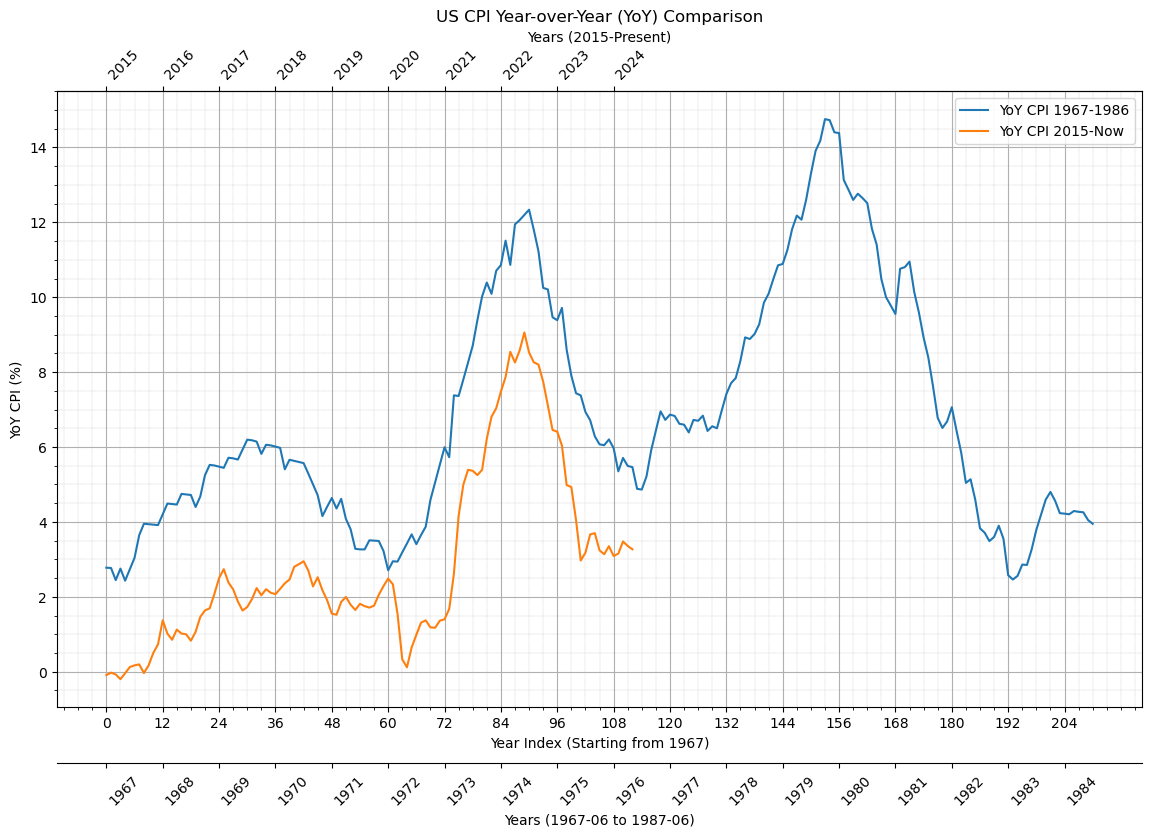

In [190]:
# Define the start and end dates for both periods
start_date_1 = datetime(1967, 6, 1)
end_date_1 = datetime(1984, 12, 31)
upload_date1 = datetime(1966, 6, 1)
upload_date2 = datetime(2014, 1, 1)
start_date_2 = datetime(2015, 1, 1)
start_date_2 = datetime(2015, 1, 1)
end_date_2 = datetime.now()

# Fetch the CPI data from FRED
cpi_data_1 = web.DataReader('CPIAUCNS', 'fred', upload_date1, end_date_1)
cpi_data_2 = web.DataReader('CPIAUCNS', 'fred', upload_date2, end_date_2)

# Calculate Year-over-Year percentage change
cpi_data_1['YoY'] = cpi_data_1['CPIAUCNS'].pct_change(periods=12) * 100
cpi_data_2['YoY'] = cpi_data_2['CPIAUCNS'].pct_change(periods=12) * 100

# Filter the data to get only YoY changes
yoy_cpi_data_1 = cpi_data_1[['YoY']].dropna()
yoy_cpi_data_2 = cpi_data_2[['YoY']].dropna()

# Reset the index to have a comparable x-axis starting from 1967
yoy_cpi_data_1.reset_index(drop=True, inplace=True)
yoy_cpi_data_2.reset_index(drop=True, inplace=True)

# Generate date ranges for the secondary and third axes
date_range_2 = pd.date_range(start='2015-01-01', periods=len(yoy_cpi_data_2), freq='M')
date_range_3 = pd.date_range(start='1967-06-01', periods=len(yoy_cpi_data_1), freq='M')

# Plot the data
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.plot(yoy_cpi_data_1.index, yoy_cpi_data_1['YoY'], label='YoY CPI 1967-1986')
ax1.plot(yoy_cpi_data_2.index, yoy_cpi_data_2['YoY'], label='YoY CPI 2015-Now')

# Set the title and labels
ax1.set_title('US CPI Year-over-Year (YoY) Comparison')
ax1.set_xlabel('Year Index (Starting from 1967)')
ax1.set_ylabel('YoY CPI (%)')
# Add gridlines every 12.5 steps
ax1.set_xticks(range(0, max(len(yoy_cpi_data_1), len(yoy_cpi_data_2)), 12))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1.grid(which='minor', linestyle=':', linewidth='0.25', color='gray')



# Add secondary x-axis for visibility aligned with orange line
secax = ax1.secondary_xaxis('top')
secax.set_xticks(range(0, len(date_range_2), 12))
secax.set_xticklabels(date_range_2[::12].strftime('%Y'), rotation=45, ha='left')
secax.set_xlabel('Years (2015-Present)')

# Add a third x-axis for visibility
third_ax = ax1.secondary_xaxis('bottom', functions=(lambda x: x, lambda x: x))
third_ax.spines['bottom'].set_position(('outward', 40))
third_ax.set_xticks(range(0, len(date_range_3), 12))
third_ax.set_xticklabels(date_range_3[::12].strftime('%Y'), rotation=45, ha='left')
third_ax.set_xlabel('Years (1967-06 to 1987-06)')
plt.legend()
# Show the plot
plt.show()


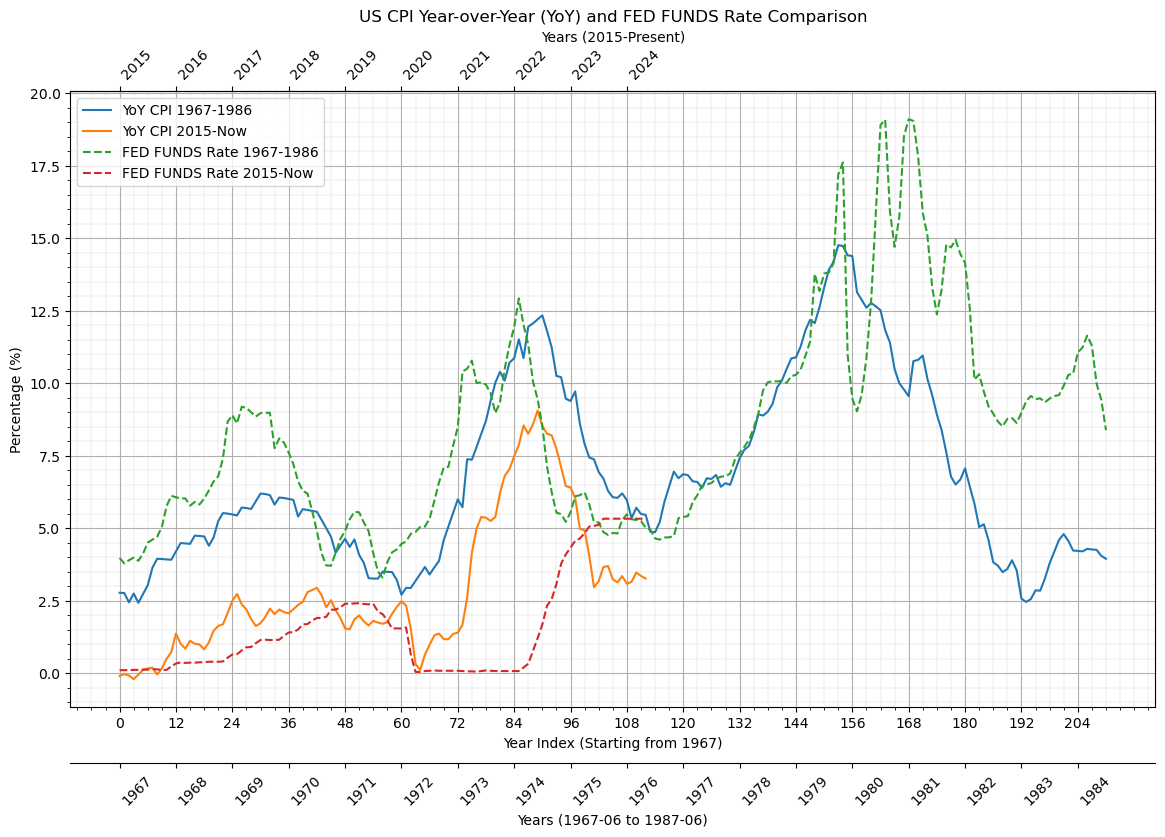

In [188]:
# Define the start and end dates for both periods
start_date_1 = datetime(1967, 6, 1)
end_date_1 = datetime(1984, 12, 31)
upload_date1 = datetime(1966, 6, 1)
upload_date2 = datetime(2014, 1, 1)
start_date_2 = datetime(2015, 1, 1)
start_date_2 = datetime(2015, 1, 1)
end_date_2 = datetime.now()

# Fetch the CPI data from FRED
cpi_data_1 = web.DataReader('CPIAUCNS', 'fred', upload_date1, end_date_1)
cpi_data_2 = web.DataReader('CPIAUCNS', 'fred', upload_date2, end_date_2)

# Fetch the FED FUNDS rate data from FRED
fed_funds_data_1 = web.DataReader('FEDFUNDS', 'fred', start_date_1, end_date_1)
fed_funds_data_2 = web.DataReader('FEDFUNDS', 'fred', start_date_2, end_date_2)
fed_funds2 = fed_funds_data_2.copy()
# Calculate Year-over-Year percentage change for CPI
cpi_data_1['YoY'] = cpi_data_1['CPIAUCNS'].pct_change(periods=12) * 100
cpi_data_2['YoY'] = cpi_data_2['CPIAUCNS'].pct_change(periods=12) * 100

# Filter the data to get only YoY changes for CPI
yoy_cpi_data_1 = cpi_data_1[['YoY']].dropna()
yoy_cpi_data_2 = cpi_data_2[['YoY']].dropna()

# Reset the index to have a comparable x-axis starting from 1967 for CPI
yoy_cpi_data_1.reset_index(drop=True, inplace=True)
yoy_cpi_data_2.reset_index(drop=True, inplace=True)

# Reset the index to have a comparable x-axis starting from 1967 for FED FUNDS rate
fed_funds_data_1.reset_index(drop=True, inplace=True)
fed_funds_data_2.reset_index(drop=True, inplace=True)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot CPI YoY
ax1.plot(yoy_cpi_data_1.index, yoy_cpi_data_1['YoY'], label='YoY CPI 1967-1986')
ax1.plot(yoy_cpi_data_2.index, yoy_cpi_data_2['YoY'], label='YoY CPI 2015-Now')

# Plot FED FUNDS rate
ax1.plot(fed_funds_data_1.index, fed_funds_data_1['FEDFUNDS'], label='FED FUNDS Rate 1967-1986', linestyle='--')
ax1.plot(fed_funds_data_2.index, fed_funds_data_2['FEDFUNDS'], label='FED FUNDS Rate 2015-Now', linestyle='--')

# Set the title and labels
ax1.set_title('US CPI Year-over-Year (YoY) and FED FUNDS Rate Comparison')
ax1.set_xlabel('Year Index (Starting from 1967)')
ax1.set_ylabel('Percentage (%)')

# Add gridlines every 12.5 steps
ax1.set_xticks(range(0, max(len(yoy_cpi_data_1), len(yoy_cpi_data_2)), 12))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1.grid(which='minor', linestyle=':', linewidth='0.25', color='gray')

# Add a legend
ax1.legend()

# Generate date ranges for the secondary and third axes
date_range_2 = pd.date_range(start='2015-01-01', periods=len(yoy_cpi_data_2), freq='M')
date_range_3 = pd.date_range(start='1967-06-01', periods=len(yoy_cpi_data_1), freq='M')

# Add secondary x-axis for visibility aligned with orange line
secax = ax1.secondary_xaxis('top')
secax.set_xticks(range(0, len(date_range_2), 12))
secax.set_xticklabels(date_range_2[::12].strftime('%Y'), rotation=45, ha='left')

secax.set_xlabel('Years (2015-Present)')

# Add a third x-axis for visibility
third_ax = ax1.secondary_xaxis('bottom', functions=(lambda x: x, lambda x: x))
third_ax.spines['bottom'].set_position(('outward', 40))
third_ax.set_xticks(range(0, len(date_range_3), 12))
third_ax.set_xticklabels(date_range_3[::12].strftime('%Y'), rotation=45, ha='left')

third_ax.set_xlabel('Years (1967-06 to 1987-06)')

# Show the plot
plt.show()


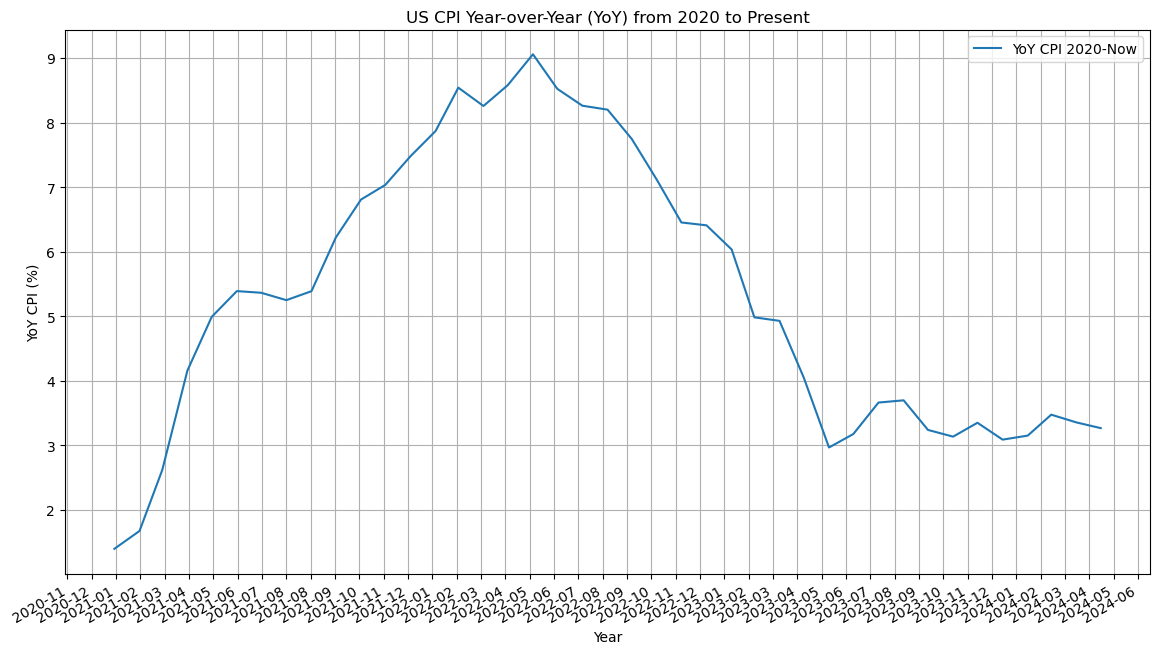

In [235]:
# Define the start and end dates for the period from 2015 to now
start_date = datetime(2020, 1, 1)
end_date = datetime.now()

# Fetch the CPI data from FRED
cpi_data = web.DataReader('CPIAUCNS', 'fred', start_date, end_date)

# Calculate Year-over-Year percentage change
cpi_data['YoY'] = cpi_data['CPIAUCNS'].pct_change(periods=12) * 100

# Filter the data to get only YoY changes
yoy_cpi_data = cpi_data[['YoY']].dropna()

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(yoy_cpi_data.index, yoy_cpi_data['YoY'], label='YoY CPI 2020-Now')

# Set the title and labels
plt.title('US CPI Year-over-Year (YoY) from 2020 to Present')
plt.xlabel('Year')
plt.ylabel('YoY CPI (%)')
plt.legend()
plt.grid(True)

# Set the x-axis to display monthly ticks
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

plt.gcf().autofmt_xdate()  # Rotate date labels automatically

plt.show()
